# Explicabilité des Modèles CNN pour la Détection de Tumeurs Cérébrales 🧠

## 🏥 Introduction

La détection de tumeurs cérébrales à partir d'images IRM est un problème critique en imagerie médicale. Les **réseaux de neurones convolutifs (CNN)**, grâce à leur capacité à extraire des caractéristiques complexes des images, ont prouvé leur efficacité dans ce domaine. Cependant, leur nature de "boîte noire" 🕵️‍♂️ rend souvent difficile l'interprétation de leurs décisions, un aspect essentiel en médecine où la compréhension des résultats est cruciale pour la confiance des praticiens.

## 🎯 Objectif

Ce notebook explore les **méthodes d'explicabilité** pour analyser et interpréter les décisions d'un modèle CNN appliqué à des images IRM de cerveaux, classées en fonction de la présence ou de l'absence de tumeurs. Nous utiliserons des outils d'interprétabilité pour répondre à des questions comme :
- **Quelles parties de l'image influencent le plus les prédictions du modèle ?** 
- **Le modèle est-il biaisé par certaines zones non pertinentes ?** 


## 🗂️ Organisation

1. **Méthodes utilisées** : 
   - Explication des méthodes d'analyse et des outils d'explicabilité adoptés pour comprendre le modèle.
   
2. **Présentation du modèle CNN** : 
   - Chargement du modèle pré-entraîné sur les données d'IRM de tumeurs cérébrales.

3. **Analyse des résultats sur des images aléatoires** : 
   - Visualisation des prédictions et génération de cartes de chaleur pour des images de test sélectionnées au hasard.

4. **Analyse des résultats sur des prédictions correctes** :
   - Étude approfondie des cartes de chaleur pour des prédictions correctes ✅.
   - Discussion sur la pertinence des zones identifiées par le modèle.

## 🛠️ Méthodes Utilisées

Nous utiliserons la bibliothèque **[Xplique](https://github.com/deel-ai/xplique)**, qui propose une suite d'outils spécialisés pour expliquer les modèles d'apprentissage profond, en particulier les CNN. Cette bibliothèque, open-source et facile à intégrer, permet d'appliquer plusieurs techniques d'interprétabilité. Voici les méthodes utilisées dans ce projet :
- **Guided Backpropagation** : Permet d'obtenir des visualisations en rétro-propageant uniquement les gradients positifs jusqu'à l'entrée. 
- **Integrated Gradients** : Attribue un score d'importance à chaque pixel en intégrant les gradients sur un chemin entre une référence neutre et l'image d'entrée. 
- **SmoothGrad** : Réduit le bruit des explications basées sur les gradients en moyennant plusieurs versions perturbées de l'image. 
- **Grad-CAM** : Génère des cartes de chaleur en utilisant les gradients des couches finales pour identifier les zones importantes.

### Xplique en action 🛠️

Voici un aperçu visuel des explications générées par **Xplique** (source : [GitHub Xplique](https://github.com/deel-ai/xplique)) :
- [Application sur une image de renard 🦊](https://github.com/deel-ai/xplique/blob/master/docs/assets/samples.png)
- [Explications visuels sur l'importance d'un pixel 🔴🟢🔵](https://github.com/deel-ai/xplique/blob/master/docs/assets/metrics.jpeg)



## 🎓 Importance Académique

Ce travail s'inscrit dans un cadre académique 🎓 et vise principalement à approfondir notre compréhension des méthodes d'explicabilité pour les modèles d'apprentissage profond, en particulier les CNN. L'objectif est d'explorer les forces et les limites de ces outils dans le contexte de la détection de tumeurs cérébrales à partir d'images IRM. 

Bien que ce projet ne soit pas destiné à une mise en production, il contribue à développer des compétences pratiques dans l'utilisation d'outils d'explicabilité et à renforcer notre capacité à analyser des modèles complexes dans des domaines critiques comme la santé. Ce travail peut également servir de base pour des recherches futures ou des applications académiques similaires.


In [ ]:
from module_for_preprocessing_metrics import *
from module_for_preprocessing_metrics import get_k_good
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from xplique.attributions import (GuidedBackprop, IntegratedGradients, SmoothGrad, GradCAM, Lime, KernelShap)
from xplique.plots import plot_attributions
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import os
import yaml

with open('../config.yml', 'r') as file:
    config = yaml.safe_load(file)
size = config['données']['image']['size']
image_size = config["données"]["image"]["size"]
normalize = config["données"]["image"]["normalize"]
standardize = config["données"]["image"]["standardize"]
grayscale = config["données"]["image"]["grayscale"]



### 📥 Importation et Prétraitement des Données

Charger, préparer et organiser les images pour le modèle.


In [24]:
testing = os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Testing")

x_test, y_test = load_images_with_preprocessing(testing, size)

y_test_cat = to_categorical(y_test, 4)

In [25]:
print("📊 Affichage des caractéristiques du meilleur modèle sélectionné :")
model = load_saved_model('modele_brain_tumor_20241117_205951.h5')
model.summary()

📊 Affichage des caractéristiques du meilleur modèle sélectionné :
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 128)       0

Une fois les données prêtes et le modèle importé, expliquons le modèle CNN.

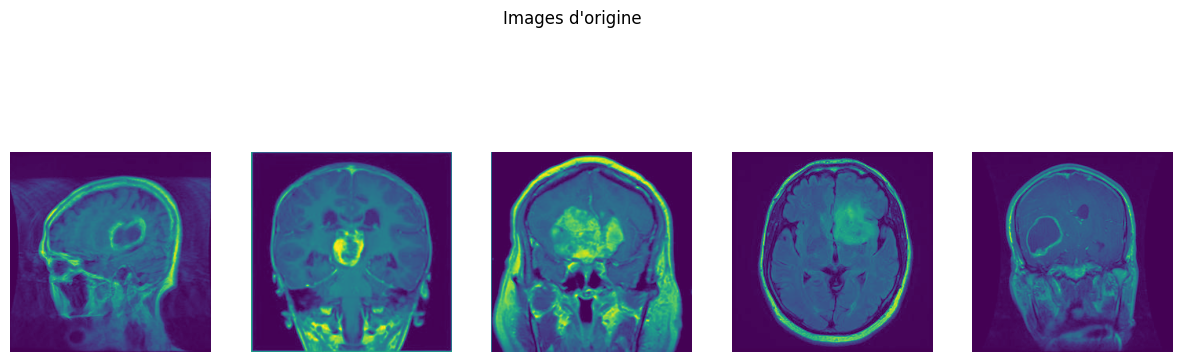

📊 Méthode : GuidedBackprop


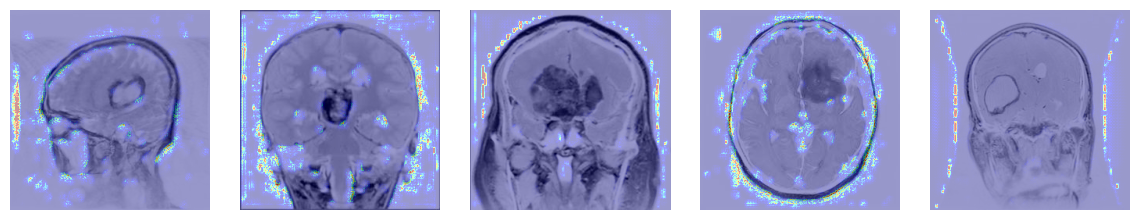



📊 Méthode : IntegratedGradients


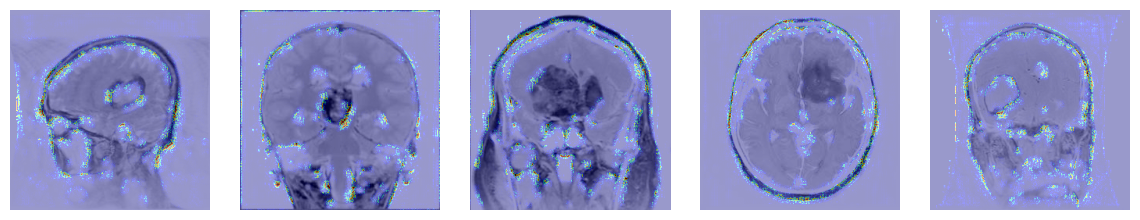



📊 Méthode : SmoothGrad


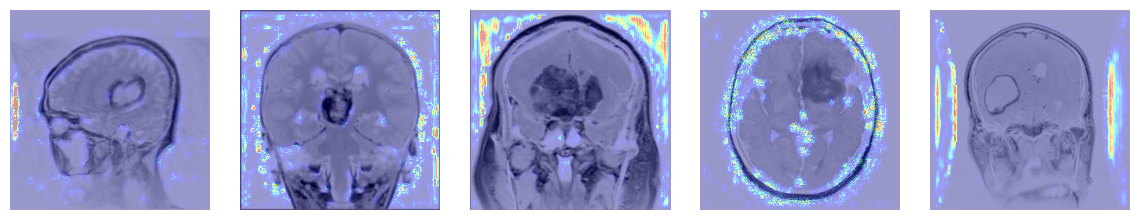



📊 Méthode : GradCAM


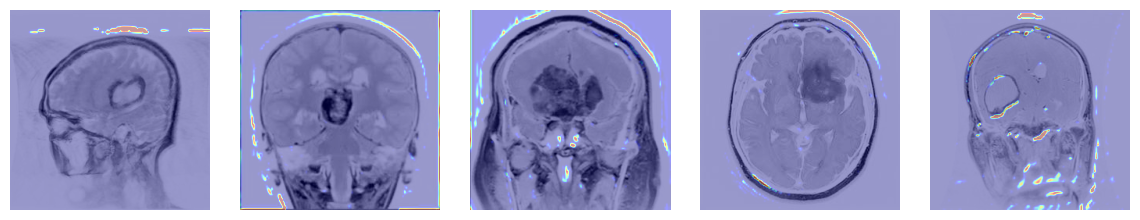

In [26]:
# Modifier l'activation de la dernière couche pour expliquer les logits
model.layers[-1].activation = tf.keras.activations.linear


batch_size = 64
X = x_test[5:10]  # Sous-échantillon des données de test
Y = y_test_cat[5:10]  # Labels correspondants

# Liste des explainers sélectionnés
explainers = [
    GuidedBackprop(model),
    IntegratedGradients(model, steps=80, batch_size=batch_size),
    SmoothGrad(model, nb_samples=80, batch_size=batch_size),
    GradCAM(model),
#    Lime(model, nb_samples=1000),
#    KernelShap(model, nb_samples=1000)
]

# Visualisation des images originales
plt.figure(figsize=(15, 5))
for i in range(len(X)):
    plt.subplot(1, len(X), i + 1)
    plt.imshow(X[i])  # Affiche l'image d'origine
    plt.axis('off')
plt.suptitle("Images d'origine")
plt.show()

# Génération et affichage des attributions pour chaque méthode
for explainer in explainers:
    print(f"📊 Méthode : {explainer.__class__.__name__}")

    # Calcul des attributions
    explanations = explainer(X, Y)

    # Affichage des attributions
    plot_attributions(
        explanations,
        X,
        img_size=2.0,
        cmap='jet',
        alpha=0.4,
        cols=len(X),
        absolute_value=True,
        clip_percentile=0.5
    )
    plt.show()
    print("\n")


# Images Bien Prédites

Voici des exemples d'images que le modèle a correctement classées.

Le modèle a utilisé des **caractéristiques clés** comme les formes ou les textures pour faire ces prédictions.


In [19]:
dir = "samples"
x_test,y_test = get_k_good(model, 4, dir)
y_test_cat = to_categorical(y_test, 4)


Image correctement classée pour meningioma_tumor sauvegardée : /Users/lilya/Downloads/M2 ISDS/Projects/Brain_tumor/results/correct_predictions/meningioma_tumor_meningioma_tumor_129.jpg
Image correctement classée pour meningioma_tumor sauvegardée : /Users/lilya/Downloads/M2 ISDS/Projects/Brain_tumor/results/correct_predictions/meningioma_tumor_image(2).jpg
Image correctement classée pour no_tumor sauvegardée : /Users/lilya/Downloads/M2 ISDS/Projects/Brain_tumor/results/correct_predictions/no_tumor_image(1).jpg
Image correctement classée pour no_tumor sauvegardée : /Users/lilya/Downloads/M2 ISDS/Projects/Brain_tumor/results/correct_predictions/no_tumor_no_tumor_49.jpg


Chargement des images bien prédites

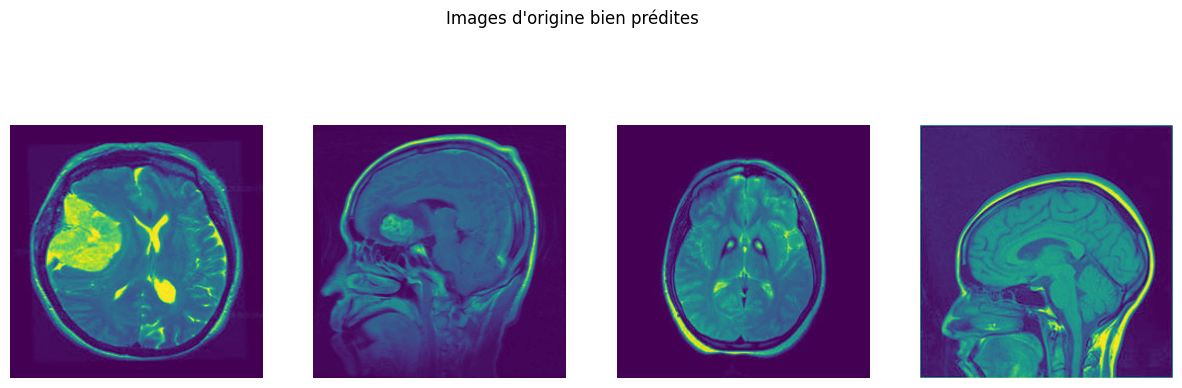

📊 Méthode : GuidedBackprop


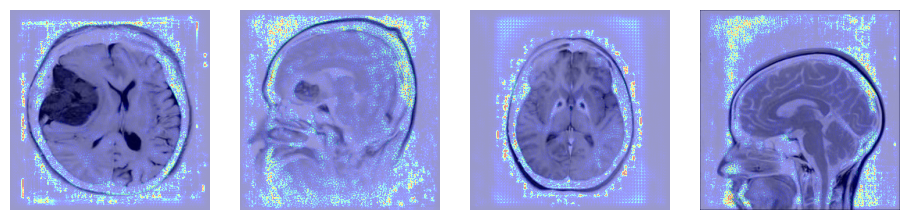



📊 Méthode : IntegratedGradients


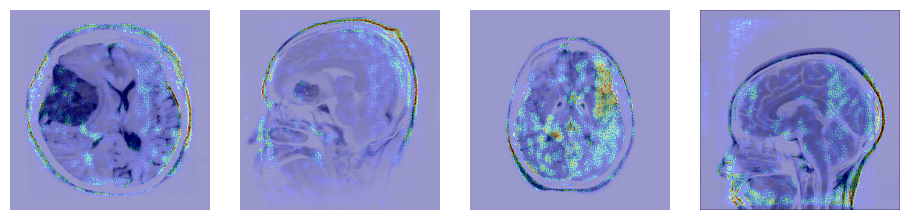



📊 Méthode : SmoothGrad


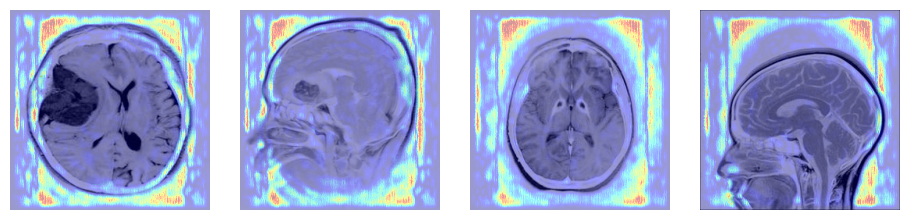



📊 Méthode : GradCAM


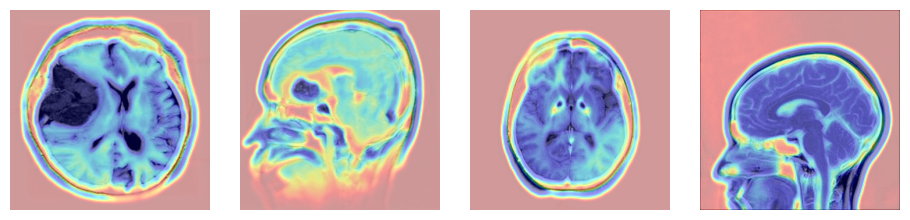

In [20]:
# Modifier l'activation de la dernière couche pour expliquer les logits
model.layers[-1].activation = tf.keras.activations.linear

# Paramètres
batch_size = 64
X = x_test # Sous-échantillon des données bien prédites
Y = y_test_cat  # Labels correspondants

# Liste des explainers sélectionnés
explainers = [
    GuidedBackprop(model),
    IntegratedGradients(model, steps=80, batch_size=batch_size),
    SmoothGrad(model, nb_samples=80, batch_size=batch_size),
    GradCAM(model),
#    Lime(model, nb_samples=1000),
#    KernelShap(model, nb_samples=1000)
]

# Visualisation des images originales
plt.figure(figsize=(15, 5))
for i in range(len(X)):
    plt.subplot(1, len(X), i + 1)
    plt.imshow(X[i])  # Affiche l'image d'origine
    plt.axis('off')
plt.suptitle("Images d'origine bien prédites")
plt.show()

# Génération et affichage des attributions pour chaque méthode
for explainer in explainers:
    print(f"📊 Méthode : {explainer.__class__.__name__}")

    # Calcul des attributions
    explanations = explainer(X, Y)

    # Affichage des attributions
    plot_attributions(
        explanations,
        X,
        img_size=2.0,
        cmap='jet',
        alpha=0.4,
        cols=len(X),
        absolute_value=True,
        clip_percentile=0.5
    )
    plt.show()
    print("\n")



## Conclusion  
Le modèle utilise des zones **clés** comme les contours, les structures internes et les régions tumorales pour classer les images.  
Chaque méthode apporte une **vision différente**, confirmant la cohérence des prédictions.
